In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import arviz as az
import matplotlib.pyplot as plt
import IPython

from meridian import constants
from meridian.data import load
from meridian.data import test_utils
from meridian.model import model
from meridian.model import spec
from meridian.model import prior_distribution
from meridian.analysis import optimizer
from meridian.analysis import analyzer
from meridian.analysis import visualizer
from meridian.analysis import summarizer
from meridian.analysis import formatter

2025-05-02 14:44:41.020147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746197081.228381  333024 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746197081.291069  333024 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-02 14:44:41.845501: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [4]:
marketing_spend= pd.read_csv('/home/ubuntu/work/marketing/marketing_analytics/functionalised/data/raw_data/advertising_raw.csv')

/tmp/ipykernel_333024/1607298651.py:1: DtypeWarning: Columns (25,32) have mixed types. Specify dtype option on import or set low_memory=False.
  marketing_spend= pd.read_csv('/home/ubuntu/work/marketing/marketing_analytics/functionalised/data/raw_data/advertising_raw.csv')


In [5]:
marketing_spend.head()

,Unnamed: 0,marketing_campaign_name,event_id,event_salesforce_conference_ids,conference_year,event_currency_id,currency_id,event_date,impressions,parent_conference,previous_year_event_id,next_year_event_id,classification_sub_group,event_tito_id,classification_id,marketing_platform_id,clicks,date_id,reach,event_salesforce_campaign_ids,event_avenger_id,campaign_spend_eur,days_to_event,marketing_campaign_objective,campaign_spend,marketing_ad_account_id,marketing_platform_name,event_avenger_slug,last_ingestion_timestamp,weeks_to_event,event_name,classification_group,marketing_campaign_id,event_tito_slug,reach_country_id,marketing_ad_account_name
0,0,Conf=Collision2023&Activity=open_source&Object...,20ed6ee7-0a8f-41b7-8497-a5733dc61431,[a0J7R00000e9R6vUAE],2023,5,2,2023-06-26,24817,Collision,72edb4ba-5f10-4e5f-b639-2bddda108dc2,ad7088bb-6473-4f4c-8ccf-567dbb9c306b,Open Source,unknown,generalattendee-subsid_opensource,8,70.0,2023-05-03,0,[7017R000001yUJ0QAM],20ed6ee7-0a8f-41b7-8497-a5733dc61431,147.373190,54.0,CLICKS,161.565228,t2_2y0f1uhq,Reddit,cc23,2024-10-07T03:50:02.858,7.0,2023 Collision,General Attendee- Subsid,1684929535866970982,unknown,---,CollisionConf
1,1,Conf=Collision2023&Activity=alpha&Objective=Le...,20ed6ee7-0a8f-41b7-8497-a5733dc61431,[a0J7R00000e9R6vUAE],2023,5,2,2023-06-26,6191,Collision,72edb4ba-5f10-4e5f-b639-2bddda108dc2,ad7088bb-6473-4f4c-8ccf-567dbb9c306b,ALPHA,unknown,startups_alpha,8,28.0,2023-05-03,0,[7017R000001yUJ0QAM],20ed6ee7-0a8f-41b7-8497-a5733dc61431,55.369416,54.0,CLICKS,60.701491,t2_2y0f1uhq,Reddit,cc23,2024-10-07T03:50:02.858,7.0,2023 Collision,Startups,1689310747829239719,unknown,---,CollisionConf
2,2,Conf=WebSummit2022&Activity=general_attendee&O...,f0009977-13e9-460a-9d34-3efca62a3b36,[a0J7R00000e9KOVUA2],2022,1,2,2022-11-01,613019,Web Summit,aebb4e42-a61d-4b12-8850-aa1d5bafb053,494e0d47-2838-43c4-bf1a-12aea8d65194,General Attendee,unknown,generalattendee_generalattendee,8,1516.0,2022-09-10,0,[7012X000001TH0oQAG],f0009977-13e9-460a-9d34-3efca62a3b36,1828.317769,52.0,CLICKS,1852.268732,t2_48ksux2y,Reddit,ws22,2024-10-07T03:50:02.858,7.0,Web Summit 2022,General Attendee,1523191475961491496,unknown,---,WebSummitConf
3,3,Conf=Collision2022&Activity=general_attendee&O...,72edb4ba-5f10-4e5f-b639-2bddda108dc2,[a0J2X00000dYpCfUAK],2022,5,2,2022-06-20,39309,Collision,2021-collision,20ed6ee7-0a8f-41b7-8497-a5733dc61431,General Attendee,unknown,generalattendee_generalattendee,8,127.0,2022-04-29,0,[7012X000001TULcQAO],72edb4ba-5f10-4e5f-b639-2bddda108dc2,86.894148,52.0,CLICKS,95.809488,t2_2y0f1uhq,Reddit,cc22,2024-10-07T03:50:02.858,7.0,Collision 2022,General Attendee,1426082416056841806,unknown,---,CollisionConf
4,4,Conf=Collision2022&Activity=general_attendee&O...,72edb4ba-5f10-4e5f-b639-2bddda108dc2,[a0J2X00000dYpCfUAK],2022,5,2,2022-06-20,102750,Collision,2021-collision,20ed6ee7-0a8f-41b7-8497-a5733dc61431,General Attendee,unknown,generalattendee_generalattendee,8,331.0,2022-04-28,0,[7012X000001TULcQAO],72edb4ba-5f10-4e5f-b639-2bddda108dc2,238.412503,53.0,CLICKS,262.873626,t2_2y0f1uhq,Reddit,cc22,2024-10-07T03:50:02.858,7.0,Collision 2022,General Attendee,1426082416056841806,unknown,---,CollisionConf


In [6]:
def process_marketing_spend(df):
    """
    Process marketing spend dataframe to create platform-specific spend columns
    
    Parameters:
    df (pandas.DataFrame): Input dataframe with marketing_platform_name and marketing_spend columns
    
    Returns:
    pandas.DataFrame: Processed dataframe with platform-specific spend columns
    """
    # List of platforms
    platforms = ['reddit', 'linkedin', 'facebook', 'google', 'bing', 
                'tiktok', 'twitter', 'instagram']
    
    # Create new spend columns initialized to 0
    for platform in platforms:
        df[f'{platform}_spend'] = 0
        
    # Iterate through each row and assign spend to appropriate column
    for idx, row in df.iterrows():
        platform = row['marketing_platform_name'].lower()
        if platform in platforms:
            df.at[idx, f'{platform}_spend'] = row['campaign_spend_eur']
    
    return df

def process_marketing_impressions(df):
    """
    Process marketing spend dataframe to create platform-specific spend columns
    
    Parameters:
    df (pandas.DataFrame): Input dataframe with marketing_platform_name and marketing_spend columns
    
    Returns:
    pandas.DataFrame: Processed dataframe with platform-specific spend columns
    """
    # List of platforms
    platforms = ['reddit', 'linkedin', 'facebook', 'google', 'bing', 
                'tiktok', 'twitter', 'instagram']
    
    # Create new spend columns initialized to 0
    for platform in platforms:
        df[f'{platform}_impressions'] = 0
        
    # Iterate through each row and assign spend to appropriate column
    for idx, row in df.iterrows():
        platform = row['marketing_platform_name'].lower()
        if platform in platforms:
            df.at[idx, f'{platform}_spend'] = row['impressions']
    
    return df

# Example usage:
# marketing_spend_processed = process_marketing_spend(marketing_spend)

# To verify the results:
# print(marketing_spend_processed.head())


In [7]:
processed_marketing_spend = process_marketing_spend(marketing_spend)
processed_marketing_spend = process_marketing_impressions(processed_marketing_spend)

/tmp/ipykernel_333024/623930320.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '147.37319' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, f'{platform}_spend'] = row['campaign_spend_eur']
/tmp/ipykernel_333024/623930320.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2231.85' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, f'{platform}_spend'] = row['campaign_spend_eur']
/tmp/ipykernel_333024/623930320.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.02' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, f'{platform}_spend'] = row['campaign_spend_eur']


In [8]:
df_web_summit = processed_marketing_spend[processed_marketing_spend['event_name'].str.contains('Web Summit 2023')]
df_web_summit.to_csv('./ws_attempt/data/raw_data/marketing_spend_processed_new_approach_web_summit.csv')

In [9]:
df_web_summit.head()

,Unnamed: 0,marketing_campaign_name,event_id,event_salesforce_conference_ids,conference_year,event_currency_id,currency_id,event_date,impressions,parent_conference,previous_year_event_id,next_year_event_id,classification_sub_group,event_tito_id,classification_id,marketing_platform_id,clicks,date_id,reach,event_salesforce_campaign_ids,event_avenger_id,campaign_spend_eur,days_to_event,marketing_campaign_objective,campaign_spend,marketing_ad_account_id,marketing_platform_name,event_avenger_slug,last_ingestion_timestamp,weeks_to_event,event_name,classification_group,marketing_campaign_id,event_tito_slug,reach_country_id,marketing_ad_account_name,reddit_spend,linkedin_spend,facebook_spend,google_spend,bing_spend,tiktok_spend,twitter_spend,instagram_spend,reddit_impressions,linkedin_impressions,facebook_impressions,google_impressions,bing_impressions,tiktok_impressions,twitter_impressions,instagram_impressions
692,692,Conf=WebSummit2023&Activity=brand&Objective=Sa...,494e0d47-2838-43c4-bf1a-12aea8d65194,[a0J7R00000iKeWDUA0],2023,1,1,2023-11-13,1,Web Summit,f0009977-13e9-460a-9d34-3efca62a3b36,bf975c07-ce2d-4870-a507-c9e5d1cd8b39,General Event,unknown,generalevent_generalevent,2,0.0,2022-12-12,0,[7012X000001TH0pQAG],494e0d47-2838-43c4-bf1a-12aea8d65194,0.000000,336.0,Unknown,0.000000,9122879804,GoogleAds,ws23,2024-10-07T03:50:02.858,48.0,Web Summit 2023,General Event,18596301002,unknown,OMN,GA - Web Summit - Euro,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0
693,693,Conf=WebSummit2023&Activity=brand&Objective=Sa...,494e0d47-2838-43c4-bf1a-12aea8d65194,[a0J7R00000iKeWDUA0],2023,1,1,2023-11-13,2,Web Summit,f0009977-13e9-460a-9d34-3efca62a3b36,bf975c07-ce2d-4870-a507-c9e5d1cd8b39,General Event,unknown,generalevent_generalevent,2,0.0,2022-12-12,0,[7012X000001TH0pQAG],494e0d47-2838-43c4-bf1a-12aea8d65194,0.000000,336.0,Unknown,0.000000,9122879804,GoogleAds,ws23,2024-10-07T03:50:02.858,48.0,Web Summit 2023,General Event,18596301002,unknown,SWE,GA - Web Summit - Euro,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0
694,694,Conf=WebSummit2023&Activity=brand&Objective=Sa...,494e0d47-2838-43c4-bf1a-12aea8d65194,[a0J7R00000iKeWDUA0],2023,1,1,2023-11-13,1,Web Summit,f0009977-13e9-460a-9d34-3efca62a3b36,bf975c07-ce2d-4870-a507-c9e5d1cd8b39,General Event,unknown,generalevent_generalevent,2,0.0,2022-12-11,0,[7012X000001TH0pQAG],494e0d47-2838-43c4-bf1a-12aea8d65194,0.000000,337.0,Unknown,0.000000,9122879804,GoogleAds,ws23,2024-10-07T03:50:02.858,48.0,Web Summit 2023,General Event,18596301002,unknown,UZB,GA - Web Summit - Euro,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0
695,695,Conf=WebSummit2023&Activity=brand&Objective=Sa...,494e0d47-2838-43c4-bf1a-12aea8d65194,[a0J7R00000iKeWDUA0],2023,1,1,2023-11-13,9,Web Summit,f0009977-13e9-460a-9d34-3efca62a3b36,bf975c07-ce2d-4870-a507-c9e5d1cd8b39,General Event,unknown,generalevent_generalevent,2,3.0,2022-12-12,0,[7012X000001TH0pQAG],494e0d47-2838-43c4-bf1a-12aea8d65194,1.399519,336.0,Unknown,1.399519,9122879804,GoogleAds,ws23,2024-10-07T03:50:02.858,48.0,Web Summit 2023,General Event,18596301002,unknown,PRT,GA - Web Summit - Euro,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0
696,696,Conf=WebSummit2023&Activity=brand&Objective=Sa...,494e0d47-2838-43c4-bf1a-12aea8d65194,[a0J7R00000iKeWDUA0],2023,1,1,2023-11-13,1,Web Summit,f0009977-13e9-460a-9d34-3efca62a3b36,bf975c07-ce2d-4870-a507-c9e5d1cd8b39,General Event,unknown,generalevent_generalevent,2,0.0,2022-12-12,0,[7012X000001TH0pQAG],494e0d47-2838-43c4-bf1a-12aea8d65194,0.000000,336.0,Unknown,0.000000,9122879804,GoogleAds,ws23,2024-10-07T03:50:02.858,48.0,Web Summit 2023,General Event,18596301002,unknown,DNK,GA - Web Summit - Euro,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0


In [10]:
numeric_columns = df_web_summit.select_dtypes(include=['int64', 'float64']).columns
df_web_summit_grouped = df_web_summit.groupby('date_id')[numeric_columns].sum().reset_index()
df_web_summit_grouped= df_web_summit_grouped.interpolate(method='linear')
df_web_summit_grouped.to_csv('./ws_attempt/data/raw_data/marketing_spend_processed_new_approach_web_summit_grouped.csv')

/tmp/ipykernel_333024/2502564572.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_web_summit_grouped= df_web_summit_grouped.interpolate(method='linear')


In [11]:
df_web_summit_grouped.head()

,date_id,Unnamed: 0,conference_year,event_currency_id,currency_id,impressions,marketing_platform_id,clicks,reach,campaign_spend_eur,days_to_event,campaign_spend,weeks_to_event,reddit_spend,linkedin_spend,facebook_spend,google_spend,bing_spend,tiktok_spend,twitter_spend,instagram_spend,reddit_impressions,linkedin_impressions,facebook_impressions,google_impressions,bing_impressions,tiktok_impressions,twitter_impressions,instagram_impressions
0,2022-10-14,138052898,873936,432,432,5217628,632,95721.0,463125,11601.776480,170640.0,11601.776480,24192.0,0.0,0,0,0,0,178077.0,0,0.0,0,0,0,0,0,0,0,0
1,2022-10-15,170945765,958902,474,474,4469560,717,90977.0,515311,10527.808851,186756.0,10527.808851,26544.0,0.0,0,0,0,0,240732.0,0,0.0,0,0,0,0,0,0,0,0
2,2022-10-16,166215940,964971,477,477,3433539,724,88392.0,577897,9977.705623,187461.0,9977.705623,26712.0,0.0,0,0,0,0,256849.0,0,0.0,0,0,0,0,0,0,0,0
3,2022-10-17,187694053,1021615,505,505,1291601,772,15940.0,574722,10234.620830,197960.0,10234.620830,28280.0,0.0,0,0,0,0,264670.0,0,0.0,0,0,0,0,0,0,0,0
4,2022-10-18,205836970,1053983,521,521,1543096,793,19589.0,642909,9969.142743,203711.0,9969.142743,28655.0,0.0,0,0,0,0,351468.0,0,0.0,0,0,0,0,0,0,0,0


## This is the section attempting to make the data evenly spaced with dates and geos

In [15]:
# Add this code to your notebook

# 1. First, let's check the data types
print("Data types before conversion:")
print(df_web_summit[['date_id', 'event_date']].dtypes)

# 2. Convert date columns to datetime
df_web_summit['date_id'] = pd.to_datetime(df_web_summit['date_id'])
df_web_summit['event_date'] = pd.to_datetime(df_web_summit['event_date'])

# 3. Verify conversion
print("\nData types after conversion:")
print(df_web_summit[['date_id', 'event_date']].dtypes)

# 4. Check for any rows where conversion failed (would be NaT)
print("\nRows with invalid dates:")
print(df_web_summit[df_web_summit['date_id'].isna()].shape[0])
print(df_web_summit[df_web_summit['event_date'].isna()].shape[0])

# 5. Identify your geo column (using reach_country_id)
geo_column = 'reach_country_id'

# 6. Check unique values in geo column
unique_geos = df_web_summit[geo_column].unique()
print(f"\nNumber of unique geos: {len(unique_geos)}")
print(f"Sample geos: {unique_geos[:5]}")

# 7. Find min and max dates
min_date = df_web_summit['date_id'].min()
max_date = df_web_summit['date_id'].max()
print(f"\nDate range: {min_date} to {max_date}")

# 8. Sort by geo and date
df_web_summit = df_web_summit.sort_values([geo_column, 'date_id'])

# 9. Calculate days between dates within each geo group
# Use a safer approach that handles the first row in each group
df_web_summit['days_diff'] = df_web_summit.groupby(geo_column)['date_id'].diff().dt.days

# 10. Check the distribution of day differences
days_diff_counts = df_web_summit['days_diff'].value_counts().head(10)
print("\nMost common day differences:")
print(days_diff_counts)

# 11. Choose a frequency based on the most common interval
# For marketing data, weekly is often appropriate
freq = 'W'  # Weekly

# 12. Create a complete date range
date_range = pd.date_range(start=min_date, end=max_date, freq=freq)
print(f"\nCreated {len(date_range)} dates with frequency {freq}")

# 13. Create a MultiIndex for all geo-date combinations
# Filter out any problematic geos (like '---' or empty strings)
valid_geos = [geo for geo in unique_geos if geo not in ['---', '', None]]
if len(valid_geos) == 0:
    # If no valid geos, create a dummy one
    valid_geos = ['default_geo']
    df_web_summit[geo_column] = 'default_geo'

complete_index = pd.MultiIndex.from_product(
    [valid_geos, date_range],
    names=[geo_column, 'date_id']
)

# 14. Prepare numeric columns for aggregation
numeric_cols = df_web_summit.select_dtypes(include=['number']).columns.tolist()
# Remove any columns you don't want to aggregate
if 'Unnamed: 0' in numeric_cols:
    numeric_cols.remove('Unnamed: 0')

# 15. Aggregate data by geo and date
print("\nAggregating data by geo and date...")
aggregated_df = df_web_summit.groupby([geo_column, 'date_id'])[numeric_cols].sum().reset_index()

# 16. Reindex to include all geo-date combinations
print("Reindexing to include all geo-date combinations...")
complete_df = aggregated_df.set_index([geo_column, 'date_id']).reindex(complete_index)

# 17. Fill missing values with interpolation within each geo
print("Filling missing values with interpolation...")
for geo in valid_geos:
    geo_mask = complete_df.index.get_level_values(geo_column) == geo
    complete_df.loc[geo_mask] = complete_df.loc[geo_mask].interpolate(method='linear')

# 18. Fill any remaining NaNs with 0
complete_df = complete_df.fillna(0)

# 19. Reset index to get geo and date back as columns
regularized_df = complete_df.reset_index()

# 20. Save to CSV
output_path = './regularized_web_summit_data.csv'
regularized_df.to_csv(output_path, index=False)

print(f"\nData has been regularized and saved to '{output_path}'")
print(f"Shape of original data: {df_web_summit.shape}")
print(f"Shape of regularized data: {regularized_df.shape}")


Data types before conversion:
date_id       datetime64[ns]
event_date            object
dtype: object

Data types after conversion:
date_id       datetime64[ns]
event_date    datetime64[ns]
dtype: object

Rows with invalid dates:
0
0

Number of unique geos: 240
Sample geos: ['OMN' 'SWE' 'UZB' 'PRT' 'DNK']

Date range: 2022-10-14 00:00:00 to 2024-06-30 00:00:00

Most common day differences:
days_diff
0.0     121744
1.0      55034
2.0       2213
3.0       1038
4.0        604
5.0        285
6.0        187
10.0       157
7.0        145
14.0       140
Name: count, dtype: int64

Created 90 dates with frequency W


/tmp/ipykernel_333024/74272928.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web_summit['date_id'] = pd.to_datetime(df_web_summit['date_id'])
/tmp/ipykernel_333024/74272928.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web_summit['event_date'] = pd.to_datetime(df_web_summit['event_date'])



Aggregating data by geo and date...
Reindexing to include all geo-date combinations...
Filling missing values with interpolation...

Data has been regularized and saved to './regularized_web_summit_data.csv'
Shape of original data: (182693, 53)
Shape of regularized data: (21510, 30)


In [16]:
regularized_df.head()

,reach_country_id,date_id,conference_year,event_currency_id,currency_id,impressions,marketing_platform_id,clicks,reach,campaign_spend_eur,days_to_event,campaign_spend,weeks_to_event,reddit_spend,linkedin_spend,facebook_spend,google_spend,bing_spend,tiktok_spend,twitter_spend,instagram_spend,reddit_impressions,linkedin_impressions,facebook_impressions,google_impressions,bing_impressions,tiktok_impressions,twitter_impressions,instagram_impressions,days_diff
0,OMN,2022-10-16,4046.0,2.0,2.0,706.0,3.0,19.0,153.0,1.681096,786.0,1.681096,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,OMN,2022-10-23,4046.0,2.0,2.0,356.0,3.0,3.0,64.0,1.507836,772.0,1.507836,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,OMN,2022-10-30,4046.0,2.0,2.0,146.0,3.0,1.0,96.0,0.487468,758.0,0.487468,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,OMN,2022-11-06,2023.0,1.0,1.0,11.0,2.0,0.0,0.0,0.000000,372.0,0.000000,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,OMN,2022-11-13,2023.0,1.0,1.0,4.0,2.0,0.0,0.0,0.000000,365.0,0.000000,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Model running!

In [1]:
coord_to_columns = load.CoordToColumns(
    time='date_id',
    geo='reach_country_id',
    controls=[],
    #population='population',
    kpi='clicks',
    #revenue_per_kpi='revenue_per_conversion',
    media=[
        'facebook_impressions',
        'linkedin_impressions',
        'google_impressions',
        'bing_impressions',
        'tiktok_impressions',
        'twitter_impressions',
        'reddit_impressions',
        'instagram_impressions',
    ],
    media_spend=[
        'facebook_spend',
        'linkedin_spend',
        'google_spend',
        'bing_spend',
        'tiktok_spend',
        'twitter_spend',
        'reddit_spend',
        'instagram_spend',
    ],
    #organic_media=['Organic_channel0_impression'],
    #non_media_treatments=['Promo'],
)

correct_media_to_channel = {
    'facebook_impressions': 'Facebook',
    'linkedin_impressions': 'LinkedIn',
    'google_impressions': 'Google',
    'bing_impressions': 'Bing',
    'tiktok_impressions': 'TickTock',
    'twitter_impressions': 'Twitter',
    'reddit_impressions': 'Reddit',
    'instagram_impressions': 'Instagram',
}
correct_media_spend_to_channel = {
    'facebook_spend': 'Facebook',
    'linkedin_spend': 'LinkedIn',
    'google_spend': 'Google',
    'bing_spend': 'Bing',
    'tiktok_spend': 'TickTock',
    'twitter_spend': 'Twitter',
    'reddit_spend': 'Reddit',
    'instagram_spend': 'Instagram',
}



loader = load.CsvDataLoader(
    csv_path="/home/ubuntu/work/marketing/google/regularized_normalised_df.csv",
    kpi_type='non_revenue',
    coord_to_columns=coord_to_columns,
    media_to_channel=correct_media_to_channel,
    media_spend_to_channel=correct_media_spend_to_channel,
)


data = loader.load()

roi_mu = 1 #0.2     # Mu for ROI prior for each media channel.
roi_sigma = 5 #0.9  # Sigma for ROI prior for each media channel.
prior = prior_distribution.PriorDistribution(
    roi_m=tfp.distributions.LogNormal(roi_mu, roi_sigma, name=constants.ROI_M)
)
model_spec = spec.ModelSpec(prior=prior, media_effects_dist='normal')

mmm = model.Meridian(input_data=data, model_spec=model_spec)

mmm.sample_prior(500)
mmm.sample_posterior(n_chains=7, n_adapt=500, n_burnin=500, n_keep=2000, seed=1)

NameError: name 'load' is not defined

In [110]:
model_fit = visualizer.ModelFit(mmm)
model_fit.plot_model_fit()

alt.LayerChart(...)

## Notes about the failure of the above graph

The fit is not working - need to normalise. See below



Hey - that apeared to work, however the fits that I'm getting out do not make sence - the expected fitted KPI does not follow the acural KPI at all - the expected looks flat. What could I be doing wrong? Should I normalise the data before feeding it into this system?

Looking at your issue with the flat expected KPI in Meridian, there are several potential causes and solutions:

Data Normalization: Yes, normalizing your data can help significantly. Meridian often works better with normalized data, especially when there are large differences in scale between variables.

# Normalize your data before feeding it to Meridian
# For each numeric column that varies widely
for col in ['clicks', 'facebook_impressions', 'google_impressions', 'facebook_spend', 'google_spend']:
    if col in df.columns:
        df[col] = (df[col] - df[col].mean()) / df[col].std()

Copy
python
Check for Data Issues:

Make sure your KPI values (clicks) have sufficient variation

Verify that your media spend and impressions data correlate with your KPI

# Check variation in your KPI
print("KPI stats:", df['clicks'].describe())
print("KPI variance:", df['clicks'].var())

# Check correlations
correlations = df[['clicks', 'facebook_impressions', 'google_impressions', 
                  'facebook_spend', 'google_spend']].corr()
print("Correlations with KPI:\n", correlations['clicks'])

Copy
python
Model Specification: You might need to adjust your model parameters:

# Try different prior distributions
roi_mu = 0.5     # Try different values (0.1 to 1.0)
roi_sigma = 0.5  # Try different values (0.3 to 1.0)

prior = prior_distribution.PriorDistribution(
    roi_m=tfp.distributions.LogNormal(roi_mu, roi_sigma, name=constants.ROI_M)
)

# Add adstock parameters if not already using them
model_spec = spec.ModelSpec(
    prior=prior,
    media_transforms={
        'Facebook': {'adstock': {'theta': 0.7, 'shape': 'geometric'}},
        'Google': {'adstock': {'theta': 0.6, 'shape': 'geometric'}},
        'LinkedIn': {'adstock': {'theta': 0.5, 'shape': 'geometric'}},
        # Add for other channels
    }
)

Copy
python
Sampling Parameters: Increase the number of samples:

mmm.sample_prior(1000)  # Increase from 500
mmm.sample_posterior(n_chains=4, n_adapt=1000, n_burnin=1000, n_keep=2000, seed=1)

Copy
python
Check for Outliers: Extreme values can distort the model:

# Check for outliers in your KPI and media data
for col in ['clicks'] + [col for col in df.columns if 'impressions' in col or 'spend' in col]:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
        print(f"Outliers in {col}: {len(outliers)}")

Copy
python
Data Aggregation: If you're working with very granular data, try aggregating:

# Aggregate by week instead of day
df['week'] = pd.to_datetime(df['date_id']).dt.isocalendar().week
df_weekly = df.groupby(['week', 'reach_country_id']).sum().reset_index()

Copy
python
Visualize Your Data:

# Plot KPI over time to check for patterns
plt.figure(figsize=(12, 6))
for geo in df['reach_country_id'].unique():
    geo_data = df[df['reach_country_id'] == geo]
    plt.plot(pd.to_datetime(geo_data['date_id']), geo_data['clicks'], label=geo)
plt.legend()
plt.title('KPI Over Time by Geography')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.show()

Copy
python
Check Model Diagnostics:

# After running the model, check diagnostics
posterior_samples = mmm.get_posterior_samples()
print("R-hat values:", posterior_samples.r_hat)
print("Effective sample size:", posterior_samples.n_eff)

Copy
python
Try these approaches one by one to identify what's causing the flat expected KPI issue. Normalization is often a good first step, followed by checking for data quality issues and adjusting model parameters.

In [113]:
regularized_df.columns

Index(['reach_country_id', 'date_id', 'conference_year', 'event_currency_id',
       'currency_id', 'impressions', 'marketing_platform_id', 'clicks',
       'reach', 'campaign_spend_eur', 'days_to_event', 'campaign_spend',
       'weeks_to_event', 'reddit_spend', 'linkedin_spend', 'facebook_spend',
       'google_spend', 'bing_spend', 'tiktok_spend', 'twitter_spend',
       'instagram_spend', 'reddit_impressions', 'linkedin_impressions',
       'facebook_impressions', 'google_impressions', 'bing_impressions',
       'tiktok_impressions', 'twitter_impressions', 'instagram_impressions',
       'days_diff'],
      dtype='object')

In [114]:
# Normalize your data before feeding it to Meridian
# For each numeric column that varies widely
def normalise_column(df):
    columns = [
        'impressions',  'clicks',
       'campaign_spend_eur', 'campaign_spend',
        'reddit_spend', 'linkedin_spend', 'facebook_spend',
       'google_spend', 'bing_spend', 'tiktok_spend', 'twitter_spend',
       'instagram_spend', 'reddit_impressions', 'linkedin_impressions',
       'facebook_impressions', 'google_impressions', 'bing_impressions',
       'tiktok_impressions', 'twitter_impressions', 'instagram_impressions',
       ]
    for col in columns:
        if col in df.columns:
            df[col] = (df[col] - df[col].mean()) / df[col].std()
    return df


In [19]:
regularized_df = pd.DataFrame(regularized_df)
regularized_df.to_csv('regularized_normalised_df_2.csv', index=False)

In [21]:
coord_to_columns = load.CoordToColumns(
    time='date_id',
    geo='reach_country_id',
    controls=[],
    #population='population',
    kpi='clicks',
    #revenue_per_kpi='revenue_per_conversion',
    media=[
        'facebook_impressions',
        'linkedin_impressions',
        'google_impressions',
        'bing_impressions',
        'tiktok_impressions',
        'twitter_impressions',
        'reddit_impressions',
        'instagram_impressions',
    ],
    media_spend=[
        'facebook_spend',
        'linkedin_spend',
        'google_spend',
        'bing_spend',
        'tiktok_spend',
        'twitter_spend',
        'reddit_spend',
        'instagram_spend',
    ],
    #organic_media=['Organic_channel0_impression'],
    #non_media_treatments=['Promo'],
)

correct_media_to_channel = {
    'facebook_impressions': 'Facebook',
    'linkedin_impressions': 'LinkedIn',
    'google_impressions': 'Google',
    'bing_impressions': 'Bing',
    'tiktok_impressions': 'TickTock',
    'twitter_impressions': 'Twitter',
    'reddit_impressions': 'Reddit',
    'instagram_impressions': 'Instagram',
}
correct_media_spend_to_channel = {
    'facebook_spend': 'Facebook',
    'linkedin_spend': 'LinkedIn',
    'google_spend': 'Google',
    'bing_spend': 'Bing',
    'tiktok_spend': 'TickTock',
    'twitter_spend': 'Twitter',
    'reddit_spend': 'Reddit',
    'instagram_spend': 'Instagram',
}



loader = load.CsvDataLoader(
    csv_path="/home/ubuntu/work/marketing/google/regularized_normalised_df_2.csv",
    kpi_type='non_revenue',
    coord_to_columns=coord_to_columns,
    media_to_channel=correct_media_to_channel,
    media_spend_to_channel=correct_media_spend_to_channel,
)


data = loader.load()

roi_mu = 1 #0.2     # Mu for ROI prior for each media channel.
roi_sigma = 5 #0.9  # Sigma for ROI prior for each media channel.
prior = prior_distribution.PriorDistribution(
    roi_m=tfp.distributions.LogNormal(roi_mu, roi_sigma, name=constants.ROI_M)
)
model_spec = spec.ModelSpec(prior=prior, media_effects_dist='normal')

mmm = model.Meridian(input_data=data, model_spec=model_spec)

mmm.sample_prior(500)
mmm.sample_posterior(n_chains=7, n_adapt=500, n_burnin=500, n_keep=2000, seed=1)

/home/ubuntu/.local/lib/python3.10/site-packages/meridian/data/load.py:1023: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df[geo_column_name] = self.df[geo_column_name].replace(
/home/ubuntu/.local/lib/python3.10/site-packages/meridian/data/load.py:201: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if (constants.GEO) not in self.dataset.dims.keys():
/home/ubuntu/.local/lib/python3.10/site-packages/meridian/data/load.py:231: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more c

In [23]:

model_fit = visualizer.ModelFit(mmm)
model_fit.plot_model_fit()

alt.LayerChart(...)

In [ ]:
# Ok - lets look at the data and the posterior sampline

Impression columns: ['impressions', 'reddit_impressions', 'linkedin_impressions', 'facebook_impressions', 'google_impressions', 'bing_impressions', 'tiktok_impressions', 'twitter_impressions', 'instagram_impressions']


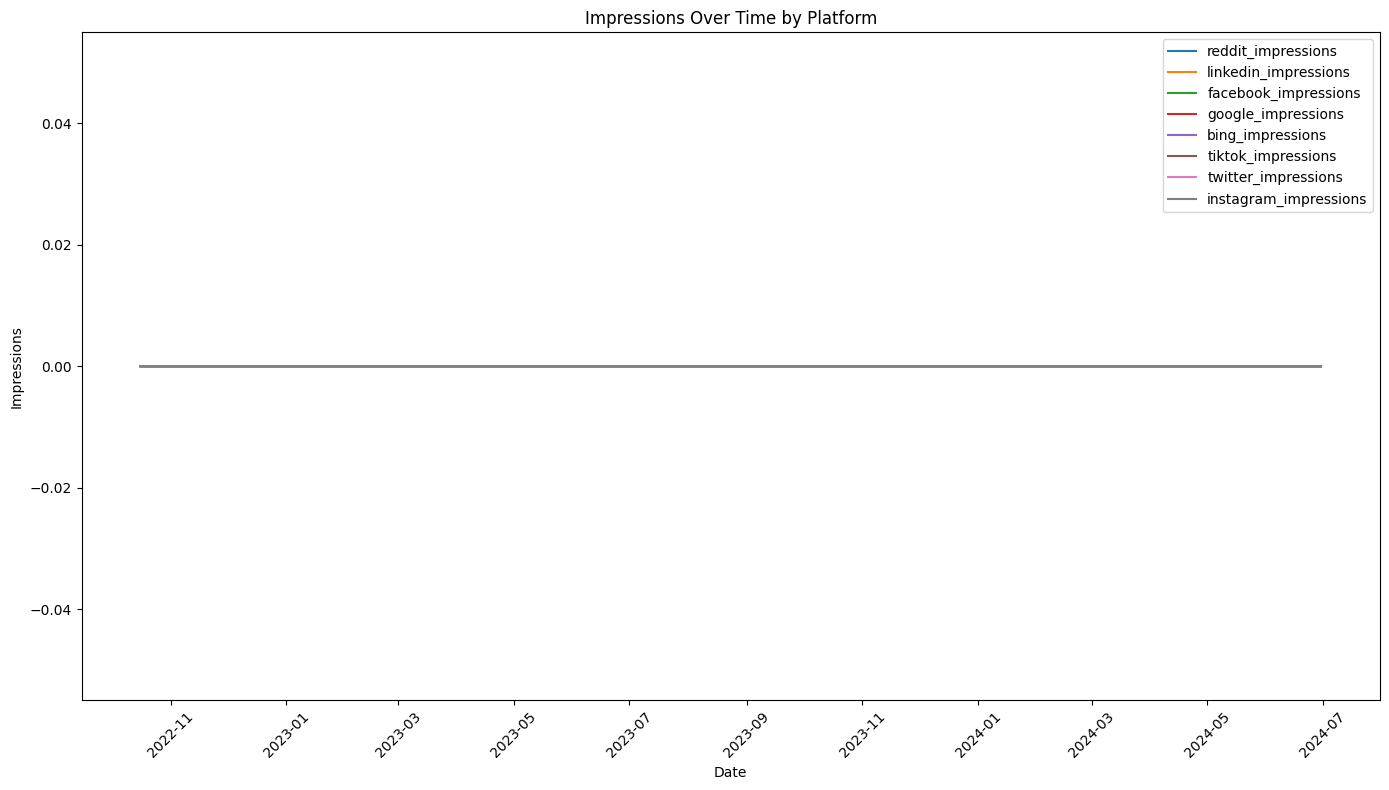

In [25]:
# First, identify all impression columns in your DataFrame
impression_columns = [col for col in regularized_df.columns if 'impressions' in col]
print("Impression columns:", impression_columns)
impression_columns.pop(0)  # Remove the first column if it's not needed
# Basic line plot of all impression columns over time
plt.figure(figsize=(14, 8))
for col in impression_columns:
    plt.plot(regularized_df['date_id'], regularized_df[col], label=col)
plt.legend()
plt.title('Impressions Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

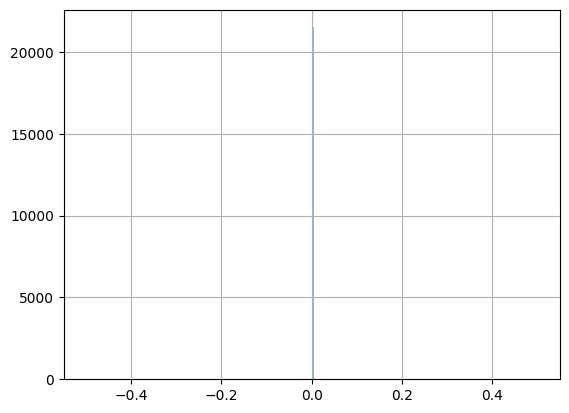

In [28]:
regularized_df['reddit_impressions'].hist(bins=200, alpha=0.5, label='Reddit Impressions')

In [29]:
regularized_df['reddit_impressions']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21505    0.0
21506    0.0
21507    0.0
21508    0.0
21509    0.0
Name: reddit_impressions, Length: 21510, dtype: float64

In [30]:
# THERE ARE NO IMPRESSIONS - THAT IS WHY IT IS FAILING!!
